<a href="https://colab.research.google.com/github/nidjosep/student-feedback-analysis/blob/master/Model_2_Actionable_Insights_from_Student_Feedback_Sentiment_Analysis_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
import tensorflow as tf
from google.colab import drive


# Download NLTK stopwords
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Mount your Google Drive
drive.mount('/content/drive', force_remount=True)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/MCSC/TME_6015/Project/Emotion_final.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mounted at /content/drive


In [320]:
df['text_length'] = df['Review'].apply(len)
df.head()
df['Review']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Review, Length: 21459, dtype: object

In [321]:
train0=df[df['Label']=="sadness"]
train1=df[df['Label']=="anger"]
train2=df[df['Label']=="love"]
train3=df[df['Label']=="surprise"]
train4=df[df['Label']=="fear"]
train5=df[df['Label']=="happy"]
train5.head()


,Review,Label,text_length
8,i have been with petronas for years i feel tha...,happy,98
11,i do feel that running is a divine experience ...,happy,108
14,i have immense sympathy with the general point...,happy,219
15,i do not feel reassured anxiety is on each side,happy,47
22,i have the feeling she was amused and delighted,happy,47


In [322]:
df=pd.concat([train0,train1,train2,train3,train4,train5],axis=0)
df.head()

,Review,Label,text_length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
5,ive been feeling a little burdened lately wasn...,sadness,65
10,i feel like i have to make the suffering i m s...,sadness,66
13,i feel low energy i m just thirsty,sadness,34


In [323]:
#remove hashtags
df['Review'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)
#Remove Mention
df['Review'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)
#Remove URL
df['Review'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

df['Review']=df['Review'].str.lower()
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df.head()

,Review,Label,text_length
0,didnt feel humiliated,sadness,23
1,go feeling hopeless damned hopeful around some...,sadness,108
5,ive feeling little burdened lately wasnt sure,sadness,65
10,feel like make suffering seeing mean something,sadness,66
13,feel low energy thirsty,sadness,34


In [324]:
word_count = df['Review'].apply(lambda x: len(x.split()))
df['word_count'] = word_count
df.head()

,Review,Label,text_length,word_count
0,didnt feel humiliated,sadness,23,3
1,go feeling hopeless damned hopeful around some...,sadness,108,9
5,ive feeling little burdened lately wasnt sure,sadness,65,7
10,feel like make suffering seeing mean something,sadness,66,7
13,feel low energy thirsty,sadness,34,4


In [325]:
import spacy
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords


In [326]:
# nltk.download('stopwords')
# ps = PorterStemmer()
# df['Review'] = df['Review'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in set(stopwords.words('english'))]))
import string
# nlp = spacy.load('en_core_web_sm')
# punctuations = string.punctuation
# df['Review'] = df['Review'].apply(lambda x: ' '.join([token.text for token in nlp(x) if not token.is_punct]))

df.head()

,Review,Label,text_length,word_count
0,didnt feel humiliated,sadness,23,3
1,go feeling hopeless damned hopeful around some...,sadness,108,9
5,ive feeling little burdened lately wasnt sure,sadness,65,7
10,feel like make suffering seeing mean something,sadness,66,7
13,feel low energy thirsty,sadness,34,4


In [327]:
y = df['Label']
x = df['Review']

In [328]:
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [329]:
# Creating a word corpus for vectorization
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])



vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names_out()
denselist1 = X1.todense().tolist()
train = pd.DataFrame(denselist1, columns=feature_names1)
# splitting the training and testing part from the data
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=0)

In [330]:
x.iloc[0]

'didnt feel humiliated'

In [331]:
df.head()


,Review,Label,text_length,word_count
0,didnt feel humiliated,sadness,23,3
1,go feeling hopeless damned hopeful around some...,sadness,108,9
5,ive feeling little burdened lately wasnt sure,sadness,65,7
10,feel like make suffering seeing mean something,sadness,66,7
13,feel low energy thirsty,sadness,34,4


In [332]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,Review,Label,text_length,word_count
0,sure organisation best intentions though disag...,anger,203,14
1,sit around feel disillusioned school,sadness,49,5
2,hit ground feel daddy let go completely get te...,fear,67,9
3,know many muscles body feel one aching,sadness,89,7
4,would feel disheartened would go cardio anothe...,sadness,95,10


In [333]:
df1 = df.copy()

In [334]:
df1.head()

,Review,Label,text_length,word_count
0,sure organisation best intentions though disag...,anger,203,14
1,sit around feel disillusioned school,sadness,49,5
2,hit ground feel daddy let go completely get te...,fear,67,9
3,know many muscles body feel one aching,sadness,89,7
4,would feel disheartened would go cardio anothe...,sadness,95,10


In [335]:
x1 = df1['Review']
y1 = df1['Label']

In [336]:
# Creating a word corpus for vectorization
corpus = []
for i in range(x1.shape[0]):
    corpus.append(x1.iloc[i])
vectorizer_train = CountVectorizer(max_features=10000)
vocabulary_train = vectorizer_train.fit_transform(corpus)
bow = pd.DataFrame(vocabulary_train.toarray(), columns = vectorizer_train.get_feature_names_out())
bow['labelxyz']=df1.Label
bow.head(1)

,000,10,11,15,1978,1991,23,40,aa,aaron,...,zero,zest,zimbabwe,zombie,zombies,zone,zoom,zooming,zumba,labelxyz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,anger


In [337]:
bow.head(5)

,000,10,11,15,1978,1991,23,40,aa,aaron,...,zero,zest,zimbabwe,zombie,zombies,zone,zoom,zooming,zumba,labelxyz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,anger
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sadness
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fear
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sadness
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sadness


In [338]:
from keras.utils import to_categorical

In [339]:
train0=df[df['Label']=="sadness"]
train1=df[df['Label']=="anger"]
train2=df[df['Label']=="love"]
train3=df[df['Label']=="surprise"]
train4=df[df['Label']=="fear"]
train5=df[df['Label']=="happy"]

bow_zero = bow[bow.labelxyz == "sadness"]
bow_one = bow[bow.labelxyz == "anger"]
bow_two = bow[bow.labelxyz == "love"]
bow_three = bow[bow.labelxyz == "surprise"]
bow_four = bow[bow.labelxyz == "fear"]
bow_five = bow[bow.labelxyz == "happy"]

X_train_zero = bow_zero.sample(frac=0.8, random_state=0)
X_test_zero = bow_zero.drop(X_train_zero.index)
X_train_one = bow_one.sample(frac=0.8, random_state=0)
X_test_one = bow_one.drop(X_train_one.index)
X_train_two = bow_two.sample(frac=0.8, random_state=0)
X_test_two = bow_two.drop(X_train_two.index)
X_train_three = bow_three.sample(frac=0.8, random_state=0)
X_test_three = bow_three.drop(X_train_three.index)
X_train_four = bow_four.sample(frac=0.8, random_state=0)
X_test_four = bow_four.drop(X_train_four.index)
X_train_five = bow_five.sample(frac=0.8, random_state=0)
X_test_five = bow_five.drop(X_train_five.index)

X_train_df = pd.concat([X_train_zero, X_train_one, X_train_two, X_train_three, X_train_four, X_train_five], axis = 0)
bow_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train1 = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_zero, X_test_one, X_test_two, X_test_three, X_test_four, X_test_five], axis = 0)
bow_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test1 = list(X_test_df.labelxyz)

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels for training and test sets
y_train_encoded = label_encoder.fit_transform(y_train1)
y_test_encoded = label_encoder.transform(y_test1)
# Convert labels to one-hot encoded format
y_train_encoded = to_categorical(y_train_encoded, num_classes=6)
y_test_encoded = to_categorical(y_test_encoded, num_classes=6)
bow_train, y_train1 = np.array(bow_train), np.array(y_train1)
bow_test, y_test1 = np.array(bow_test), np.array(y_test1)

X_train_df.head()

,000,10,11,15,1978,1991,23,40,aa,aaron,...,zero,zest,zimbabwe,zombie,zombies,zone,zoom,zooming,zumba,labelxyz
6437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sadness
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sadness
8329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sadness
3065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sadness
6886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sadness


Epoch 1/10
430/430 [==============================] - 4s 7ms/step - loss: 1.1599 - accuracy: 0.5605 - val_loss: 1.0647 - val_accuracy: 0.6249
Epoch 2/10
430/430 [==============================] - 2s 5ms/step - loss: 0.4776 - accuracy: 0.8458 - val_loss: 0.6356 - val_accuracy: 0.8061
Epoch 3/10
430/430 [==============================] - 2s 5ms/step - loss: 0.2058 - accuracy: 0.9390 - val_loss: 0.5866 - val_accuracy: 0.8363
Epoch 4/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1047 - accuracy: 0.9691 - val_loss: 0.5316 - val_accuracy: 0.8791
Epoch 5/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0710 - accuracy: 0.9802 - val_loss: 0.8339 - val_accuracy: 0.8192
Epoch 6/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0564 - accuracy: 0.9856 - val_loss: 0.6256 - val_accuracy: 0.8669
Epoch 7/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0369 - accuracy: 0.9897 - val_loss: 0.5852 - val_accuracy: 0.8821
Epoch 

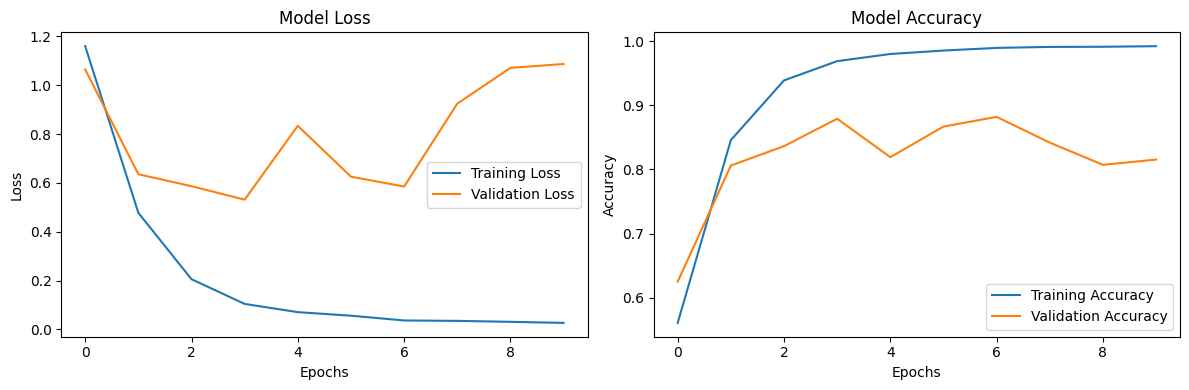

In [340]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(bow_train.shape[1],)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  # 6 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#model.add(Embedding(input_dim=5000, output_dim=128, input_length=150))


# model.add(Dropout(0.5))
#model.add(Dense(6, activation='softmax', dtype='float32'))  # Ensure output layer uses float32

#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(bow_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [341]:
df.head(0)

,Review,Label,text_length,word_count


In [344]:
text = "I was really enjoying the course."
text = remove_stop_words(text)
len_text = len(text)
word_count = len(text.split())# Creating a DataFrame
data = {
    'Text': [text],
    'Text_Length': [len_text],
    'Word_Count': [word_count]
}

df = pd.DataFrame(data)

vocabulary_test = vectorizer_train.transform(df['Text'])

# Convert to DataFrame
bow_test = pd.DataFrame(vocabulary_test.toarray(), columns=vectorizer_train.get_feature_names_out())

# Check if the shape matches the expected input shape for your model
print("Shape of the transformed test data:", bow_test.shape)

se = ["anger", "fear", "happy", "love", "sadness", "surprise"]
# If the shape is (1, 1000), you can predict using your model
if bow_test.shape[1] == 10000:
    predictions = model.predict(bow_test.values)
    print(predictions)
    predicted_classes = np.argmax(predictions, axis=1)
    print(predicted_classes)
    print(se[predicted_classes[0]])

Shape of the transformed test data: (1, 10000)
1/1 [==============================] - 0s 18ms/step
[[0.0642111  0.03556697 0.06441883 0.68278414 0.00287913 0.15013988]]
[3]
love
